<a href="https://colab.research.google.com/github/lucas-source/data-science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://www.melhoresdestinos.com.br/wp-content/uploads/2015/11/Dicas-Airbnb.jpg">


---

# Análise dos Dados do Airbnb - ***Sydney, Austrália***

  A maior empresa horteleira da atualidade [Airbnb](https://www.airbnb.com.br/). Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de uma maneira automatizada, **um pequeno detalhe a empresa não possui nenhum imóvel**.
No final de 2019, a Startup fundada 12 anos atrás, já havia **hospedado mais de 500 milhões de pessoas** ao redor de todo o mundo, 
sua maneira inovadora de conectar as pessoas explica o motivo pelo qual o Airbnb ultrapassou em poucos anos as redes de hotelaria
mais tradicionais.


---

#Por que ir a austrália?

O país é o terceiro destino mais procurado por estudantes internacionais para intercâmbio no mundo,
principais motivos para essa preferência é a alta qualidade de seu sistema de ensino. A Austrália possui sete universidades entre as 100 melhores do mundo.
A Austrália apresenta uma grande e deslumbrante diversidade ambiental. Em seu extenso território, possui um litoral de mais de 50 mil 
quilômetros com algumas das praias mais bonitas do planeta, mais de 500 parques nacionais e mais de 2.700 áreas de conservação ambiental,
O que abrigam desde santuários de vida selvagem a reservas aborígenes.
<center><img alt="Colaboratory logo" width="60%" height="70%" src="https://i.pinimg.com/564x/7d/3c/b4/7d3cb46509df665c12dd01d45bd6fbb9.jpg"></center>


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Sydney, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

  Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

  Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Informações resumidas e métricas para listagens da Austrália.*


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/australia/nsw/sydney/2021-04-10/visualisations/listings.csv")

## Análise dos Dados


Esta etapa tem por objetivo ter um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86767,151.22497,Private room,65,2,196,2020-03-13,1.42,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86490,151.19171,Private room,14315,2,526,2019-09-22,4.03,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80084,151.26378,Entire home/apt,470,5,2,2019-01-02,0.03,2,122
3,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,80,2,367,2021-03-07,3.30,1,336
4,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,3,76,2020-01-03,0.60,1,0


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))    #linhas
print("Variáveis:\t {}\n".format(df.shape[1])) #colunas

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 32679
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,3% dos valores nulos.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.294042
last_review                       0.294042
host_name                         0.029897
name                              0.000367
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

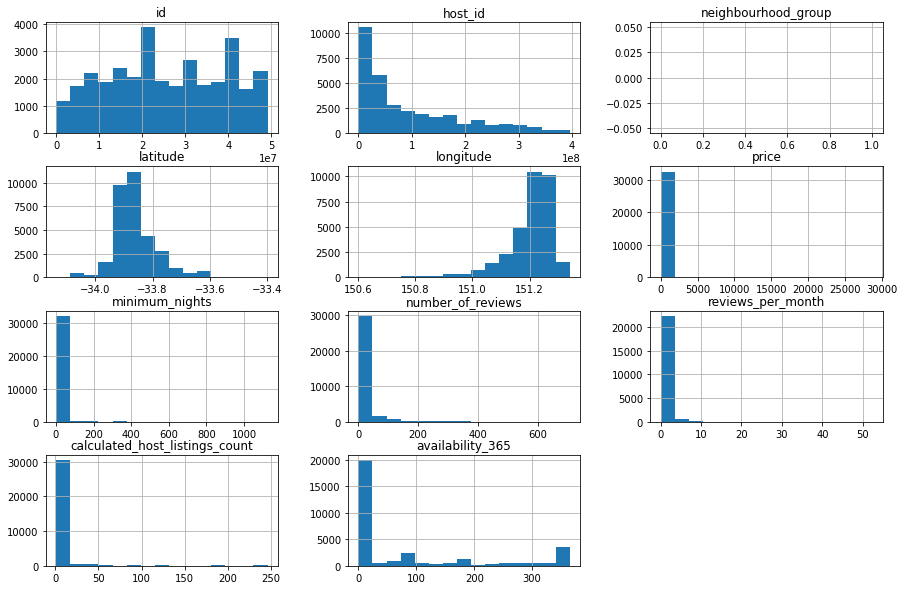

In [11]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [12]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,32679.000000,32679.000000,32679.000000,23070.000000,32679.000000,32679.000000
mean,222.675418,6.429113,14.680345,0.636133,7.732275,84.196365
std,462.595249,32.446732,37.516748,1.129832,28.852122,128.114425
min,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,74.000000,1.000000,0.000000,0.060000,1.000000,0.000000
50%,121.000000,2.000000,2.000000,0.180000,1.000000,0.000000
75%,220.000000,5.000000,10.000000,0.757500,2.000000,145.000000
max,28613.000000,1125.000000,708.000000,52.270000,246.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 220, porém seu valor máximo é 28613.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

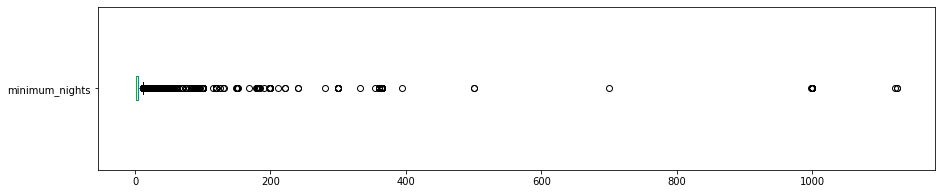

minimum_nights: valores acima de 30:
589 entradas
1.8024%


In [13]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### **Boxplot para price**

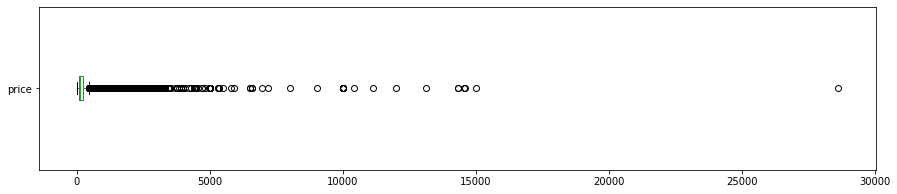


price: valores acima de 1500
341 entradas
1.0435%


In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### **Histogramas sem outliers**

Já que identificamos outliers nas variáveis *price* e *minimum_nights*, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

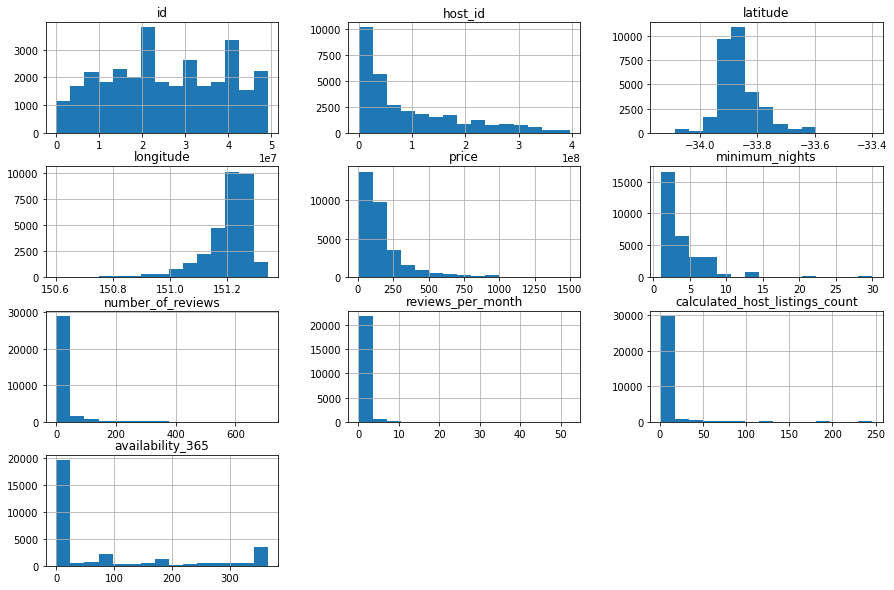

In [16]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [17]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.087601,-0.053922,-0.039272,0.145381,0.111441
minimum_nights,0.087601,1.000000,-0.114185,-0.154539,-0.036941,-0.029632
number_of_reviews,-0.053922,-0.114185,1.000000,0.726789,-0.030017,0.164500
reviews_per_month,-0.039272,-0.154539,0.726789,1.000000,0.045166,0.218630
calculated_host_listings_count,0.145381,-0.036941,-0.030017,0.045166,1.000000,0.212452
availability_365,0.111441,-0.029632,0.164500,0.218630,0.212452,1.000000


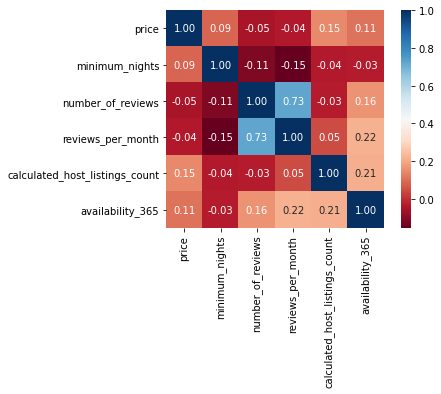

In [18]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    19035
Private room       11917
Shared room          566
Hotel room           233
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.599509
Private room       0.375327
Shared room        0.017826
Hotel room         0.007338
Name: room_type, dtype: float64

### **Qual a localidade mais cara de Sydney?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [21]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater           487.576740
Mosman              369.572414
Hunters Hill        341.264151
Manly               297.510652
Warringah           275.200977
Woollahra           233.968750
Sutherland Shire    228.716567
Waverley            220.258982
Leichhardt          207.040629
Lane Cove           194.271698
Name: price, dtype: float64

Acima, vemos que bairros como Pittwater, Mosman, Louvre e Hunters Hill são localidades mais populares e por isso possuem os maiores preços na média de cada bairro

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

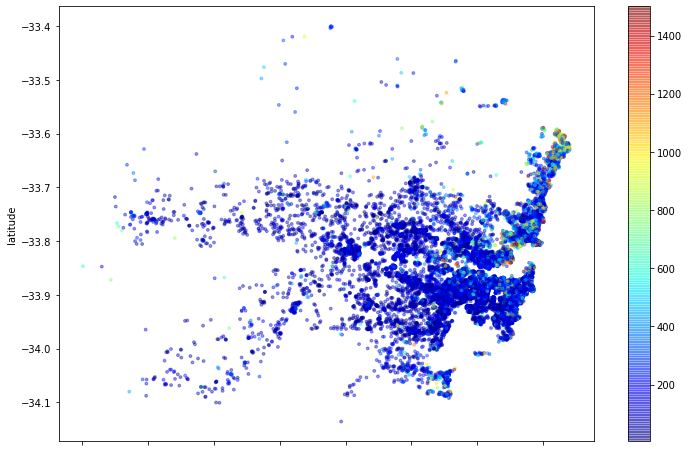

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### Qual é a média do mínimo de noites para aluguel (minimum_nights)?

Sabemos que os anfitriões do Airbnb normalmente costuma colocar um minimo de noites, ainda mais em alta temporada que sai mais vantajoso para quem vai alugar imóveis. Sendo assim, verificamos que o mínimo de noite na média é de aproximadamente 3 noites.

In [23]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

3.869169474977166

## Conclusões


Sydney é uma cidade incrível, o turismo é muito forte pela bela paisagem, gastronomia e o que a cidade pode oferecer para quem vai viajar.

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis que distorcem as informações quando apresentados gráficos sem limpeza. Conseguimos perceber a importância da estatística quando falamos em Ciência de dados. Conseguimos identificar quais bairros possuem mais locações e a média dos preços de cada bairro.

Por fim, esse dataset é uma versão resumida, ideal para uma análise inicial, mas podemos perceber que já podemos extrair muitas informações, imagina um dataset que possui mais atributos e variáveis? Conseguimos extrair informações que nem imaginamos que podem ser analisadas e nos dar insights de um estudo completo